<a href="https://colab.research.google.com/github/Nasim-Mahmud/Faces-tell-all_non-linear-neural-network/blob/main/faces_tell_all_non_linear_nn_based_decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
### Here, I have shown a model example where I have used a custom CNN model. We can use either ResNet50 or VGG16 to build out CNN model which will be able to predict the age and the gender of people. This project is on a testing phase.

In [1]:
# TO run in google colab
!pip install -q kaggle

# Upload the API token file downloaded from your profile settings.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nasimmahmud","key":"92f198c74d69551fe2e92079d02b952f"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Dataset API
!kaggle datasets download -d jangedoo/utkface-new

# Unzip the dataset if necessary
!unzip utkface-new.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

# Importing dependencies

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

# Data preprocessing

In [6]:
path = "/content/UTKFace"
age_labels = []
gender_labels = []
image_paths = []
for file in os.listdir(path):
    age_labels.append(int(file.split('_')[0]))
    gender_labels.append(int(file.split('_')[1]))
    image_paths.append(file)

In [7]:
image_paths[:3]

['36_0_1_20170116193844474.jpg.chip.jpg',
 '35_1_0_20170117135118514.jpg.chip.jpg',
 '27_1_0_20170103230354912.jpg.chip.jpg']

In [8]:
df = pd.DataFrame({'age':age_labels, 'gender':gender_labels, 'image': image_paths})

In [9]:
df.shape

(23708, 3)

In [10]:
df.head()

,age,gender,image
0,36,0,36_0_1_20170116193844474.jpg.chip.jpg
1,35,1,35_1_0_20170117135118514.jpg.chip.jpg
2,27,1,27_1_0_20170103230354912.jpg.chip.jpg
3,44,0,44_0_1_20170113184928967.jpg.chip.jpg
4,2,1,2_1_4_20161221195057952.jpg.chip.jpg


In [11]:
gender_dict = {0:"Male",1:"Female"}

In [12]:
df = df.astype({'age':'float32', 'gender': 'int32'})

In [13]:
df.dtypes

age       float32
gender      int32
image      object
dtype: object

In [14]:
df.image[5]

'37_0_0_20170117140050797.jpg.chip.jpg'

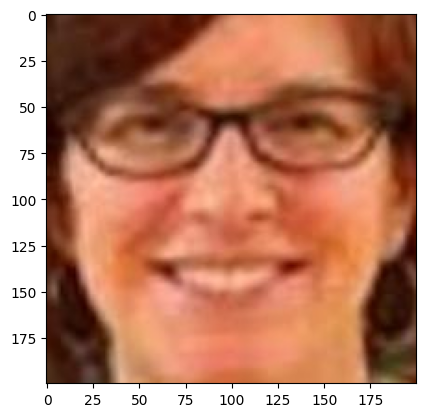

In [16]:
img = Image.open("/content/UTKFace/"+df.image[1])
plt.imshow(img)

# Plotting

<Axes: xlabel='age', ylabel='Count'>

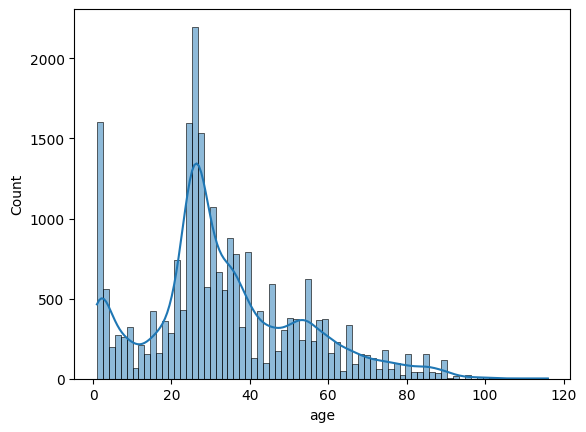

In [17]:
sns.histplot(df.age, kde=True)

In [18]:
# Splitting the dataset into train and test set
# train_df = df.sample(frac=1, random_state=0).iloc[:20000]
# test_df = df.sample(frac=1, random_state=0).iloc[20000:]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size= 0.20, random_state= 4)

In [19]:
train_df.shape

(18966, 3)

In [20]:
train_df.head()

,age,gender,image
11355,51.0,0,51_0_0_20170120134243735.jpg.chip.jpg
4549,27.0,0,27_0_1_20170117013724759.jpg.chip.jpg
21518,24.0,1,24_1_4_20170117194806829.jpg.chip.jpg
11428,56.0,0,56_0_0_20170111204518142.jpg.chip.jpg
8153,8.0,1,8_1_1_20170116153005352.jpg.chip.jpg


In [21]:
test_df.shape

(4742, 3)

# Feature extraction

In [22]:
from keras.preprocessing.image import load_img

In [23]:
X_train = []
for file in train_df.image:
    img = load_img("/content/UTKFace/"+file, color_mode="grayscale")
    img = img.resize((128,128), Image.Resampling.LANCZOS)
    img = np.array(img)
    X_train.append(img)

X_train = np.array(X_train)

X_train = X_train.reshape(len(X_train), 128,128,1)

In [24]:
X_train.shape

(18966, 128, 128, 1)

In [25]:
X_train[:1]

array([[[[136],
         [106],
         [ 64],
         ...,
         [ 57],
         [ 55],
         [ 51]],

        [[151],
         [121],
         [ 81],
         ...,
         [ 50],
         [ 50],
         [ 48]],

        [[165],
         [136],
         [ 99],
         ...,
         [ 47],
         [ 49],
         [ 49]],

        ...,

        [[ 25],
         [ 21],
         [ 19],
         ...,
         [ 23],
         [ 24],
         [ 24]],

        [[ 23],
         [ 21],
         [ 19],
         ...,
         [ 24],
         [ 24],
         [ 25]],

        [[ 22],
         [ 20],
         [ 20],
         ...,
         [ 24],
         [ 25],
         [ 25]]]], dtype=uint8)

# Normalizing data

In [26]:
X_train = X_train/255

In [27]:
X_train[:1]

array([[[[0.53333333],
         [0.41568627],
         [0.25098039],
         ...,
         [0.22352941],
         [0.21568627],
         [0.2       ]],

        [[0.59215686],
         [0.4745098 ],
         [0.31764706],
         ...,
         [0.19607843],
         [0.19607843],
         [0.18823529]],

        [[0.64705882],
         [0.53333333],
         [0.38823529],
         ...,
         [0.18431373],
         [0.19215686],
         [0.19215686]],

        ...,

        [[0.09803922],
         [0.08235294],
         [0.0745098 ],
         ...,
         [0.09019608],
         [0.09411765],
         [0.09411765]],

        [[0.09019608],
         [0.08235294],
         [0.0745098 ],
         ...,
         [0.09411765],
         [0.09411765],
         [0.09803922]],

        [[0.08627451],
         [0.07843137],
         [0.07843137],
         ...,
         [0.09411765],
         [0.09803922],
         [0.09803922]]]])

In [28]:
train_df.gender[:5]

11355    0
4549     0
21518    1
11428    0
8153     1
Name: gender, dtype: int32

In [29]:
train_df.age[:5]

11355    51.0
4549     27.0
21518    24.0
11428    56.0
8153      8.0
Name: age, dtype: float32

In [30]:
y_gender = np.array(train_df.gender)
y_age = np.array(train_df.age)

In [31]:
y_gender

array([0, 0, 1, ..., 0, 0, 1], dtype=int32)

In [32]:
y_age

array([51., 27., 24., ..., 32., 22., 26.], dtype=float32)

In [33]:
input_size = (128, 128, 1)

In [34]:
from keras.layers import Input
inputs = Input((input_size))
inputs

<KerasTensor: shape=(None, 128, 128, 1) dtype=float32 (created by layer 'input_1')>

# Data augmentation

In [35]:
# # Applying the data augmentation
# train_datagen = ImageDataGenerator(rescale= 1./255,
#                                   rotation_range= 30,
#                                   width_shift_range = 0.2,
#                                   height_shift_range= 0.2,
#                                   shear_range= 0.2,
#                                   zoom_range= 0.2,
#                                   horizontal_flip= True)
# test_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
# train_generator = train_datagen.flow_from_dataframe(train_df,
#                                                  directory= path,
#                                                  x_col= 'image_path',
#                                                  y_col= ['age','gender'],
#                                                  target_size= (200, 200),
#                                                  class_mode= 'multi_output')

# test_generator = test_datagen.flow_from_dataframe(test_df,
#                                                  directory= path,
#                                                  x_col= 'image_path',
#                                                  y_col= ['age','gender'],
#                                                  target_size= (200, 200),
#                                                  class_mode= 'multi_output')

# Creating model

In [37]:
from keras.applications.resnet50 import ResNet50
# from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model
from keras.initializers import random_uniform, glorot_uniform, constant, identity

# Testing phase: ResNet50

In [38]:
# setting include_top to False, as we only need the convolutional base.
# resnet = ResNet50(include_top=False, input_shape=(200,200,3))

# setting include_top to False, as we only need the convolutional base.
# vggnet = VGG16(include_top=False, input_shape=(200,200,3))

In [39]:
# # Setting resnet's trainanble to False, because we want to use transfer learning approach
# resnet.trainable=False

# # Setting vggnet's trainanble to False, because we want to use transfer learning approach
# # vggnet.trainable=False

# # Taking out the last output layer and assigning it into a output variable
# output= resnet.layers[-1].output

# flatten = Flatten()(output)

# dense1 = Dense(512, activation='relu')(flatten)
# dense2 = Dense(512, activation='relu')(flatten)

# dense3 = Dense(512, activation='relu')(dense1)
# dense4 = Dense(512, activation='relu')(dense2)

# output1 = Dense(1, activation='linear', name='age')(dense3)
# output2 = Dense(1, activation='sigmoid', name='gender')(dense4)

In [40]:
# Using resnet, setting inputs to resnet's input, as we are using its convolutional base
# model= Model(inputs=resnet.input, outputs=[output1, output2])

# Using vggnet, setting inputs to vggnet's input, as we are using its convolutional base
# model= Model(inputs=vggnet.input, outputs=[output1, output2])

# Custom layer

In [41]:
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1,output_2])

In [42]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 126, 126, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 126, 126, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 42, 42, 64)           0         ['batch_normalization[0][0

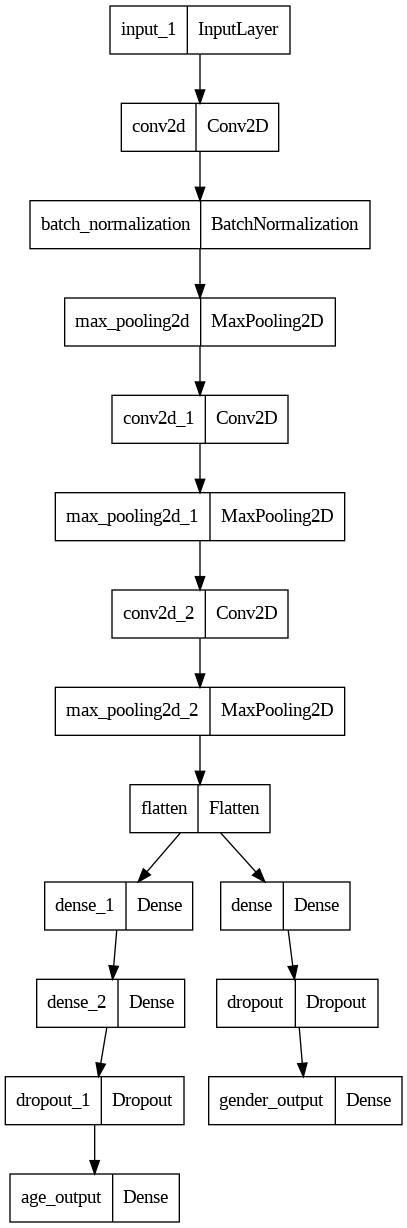

In [43]:
from keras.utils import plot_model
plot_model(model)

In [44]:
# model.compile(optimizer='adam',
#               loss={'age': 'mae', 'gender': 'binary_crossentropy'},
#               metrics={'age': 'mae', 'gender': 'accuracy'},
#               loss_weights={'age':1,'gender':99})

In [45]:
model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])

# Training

In [46]:
# history = model.fit(train_generator, batch_size=32, epochs=10, validation_data= test_generator)

In [47]:
history = model.fit(x=X_train, y=[y_gender, y_age], batch_size=32, epochs=50, validation_split=0.1, verbose=1)

Epoch 1/50
534/534 [==============================] - 28s 33ms/step - loss: 13.4531 - gender_output_loss: 0.5849 - age_output_loss: 12.8682 - gender_output_accuracy: 0.7389 - age_output_accuracy: 0.0354 - val_loss: 12.0076 - val_gender_output_loss: 0.4625 - val_age_output_loss: 11.5450 - val_gender_output_accuracy: 0.7955 - val_age_output_accuracy: 0.0432
Epoch 2/50
534/534 [==============================] - 17s 32ms/step - loss: 9.4309 - gender_output_loss: 0.3519 - age_output_loss: 9.0790 - gender_output_accuracy: 0.8394 - age_output_accuracy: 0.0085 - val_loss: 7.8251 - val_gender_output_loss: 0.3272 - val_age_output_loss: 7.4980 - val_gender_output_accuracy: 0.8498 - val_age_output_accuracy: 0.0058
Epoch 3/50
534/534 [==============================] - 16s 30ms/step - loss: 8.4621 - gender_output_loss: 0.3064 - age_output_loss: 8.1558 - gender_output_accuracy: 0.8604 - age_output_accuracy: 0.0060 - val_loss: 12.0190 - val_gender_output_loss: 0.3233 - val_age_output_loss: 11.6957 - v

# Visualization

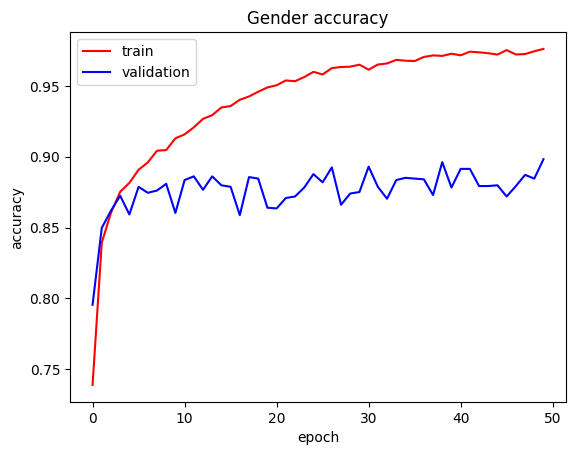

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['gender_output_accuracy'], color='red', label='train')
plt.plot(history.history['val_gender_output_accuracy'], color='blue', label='validation')
plt.title('Gender accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

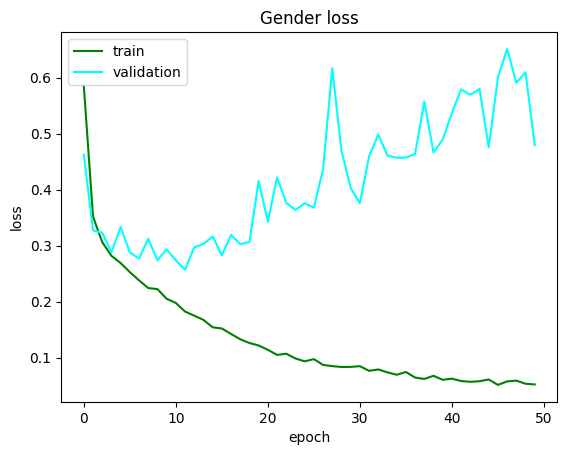

In [49]:
plt.plot(history.history['gender_output_loss'], color='green', label='train')
plt.plot(history.history['val_gender_output_loss'], color='cyan', label='validation')
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [50]:
# plt.plot(history.history['age_mae'], color='green', label='train')
# plt.plot(history.history['val_age_mae'], color='yellow', label='validation')
# plt.legend()
# plt.show()

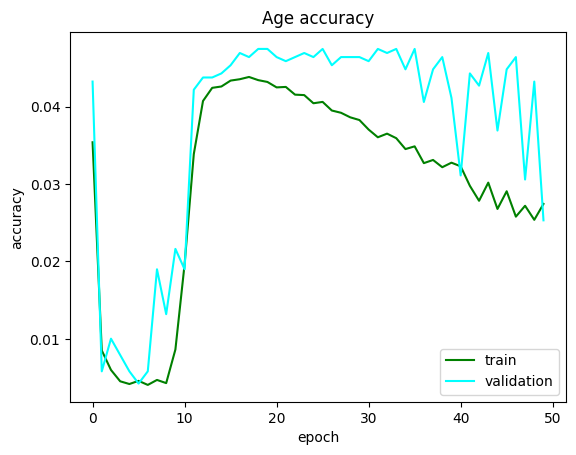

In [51]:
plt.plot(history.history['age_output_accuracy'], color='green', label='train')
plt.plot(history.history['val_age_output_accuracy'], color='cyan', label='validation')
plt.title('Age accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

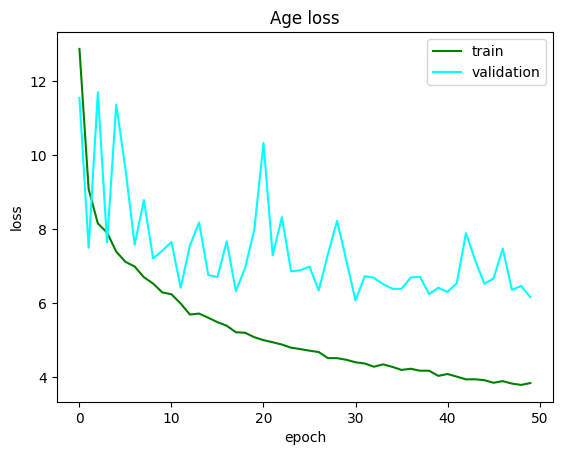

In [52]:
plt.plot(history.history['age_output_loss'], color='green', label='train')
plt.plot(history.history['val_age_output_loss'], color='cyan', label='validation')
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Prediction

1/1 [==============================] - 0s 310ms/step
Original  : Gender = Female, Age = 26.0
Prediction: Gender = Female, Age = 27


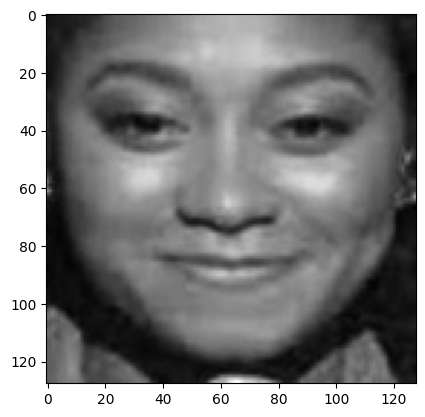

In [53]:
img_index = [101]

for i in range(0, len(img_index)):
    pred = model.predict(X_train[img_index[i]].reshape(1, 128, 128, 1))
    pred_gender = gender_dict[round(pred[0][0][0])]
    pred_age = round(pred[1][0][0])

    print(f"Original  : Gender = {gender_dict[y_gender[img_index[i]]]}, Age = { y_age[img_index[i]]}")
    print(f"Prediction: Gender = {pred_gender}, Age = {pred_age}")
    plt.imshow(X_train[img_index[i]].reshape(128,128), cmap='gray')
    plt.show()

# Predicting custom images: under construction!!!
- The program learns well from known examples, but its ability to apply that knowledge to the unknown data is yet to be fully tested.

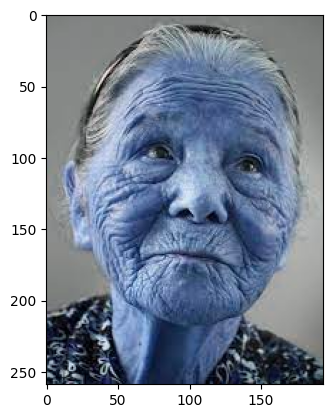

In [55]:
import cv2
test_img = cv2.imread('/content/agedWoman.jpeg')
plt.imshow(test_img)

In [56]:
test_img.shape

(259, 194, 3)

In [57]:
testing = load_img('/content/agedWoman.jpeg', color_mode= "grayscale")
testing = testing.resize((128,128), Image.Resampling.LANCZOS)
testing = np.array(testing)

1/1 [==============================] - 0s 106ms/step
Prediction: Gender = Male, Age = 7263


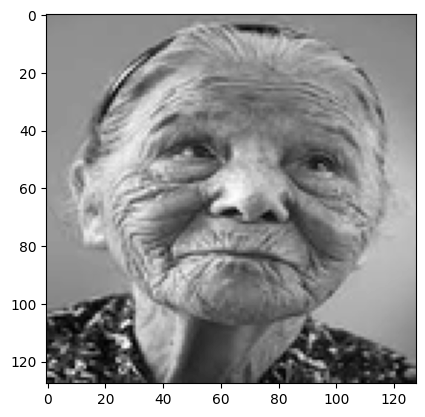

In [58]:
pred = model.predict(testing.reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print(f"Prediction: Gender = {pred_gender}, Age = {pred_age}")
plt.imshow(testing.reshape(128,128), cmap='gray')
plt.show()